1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

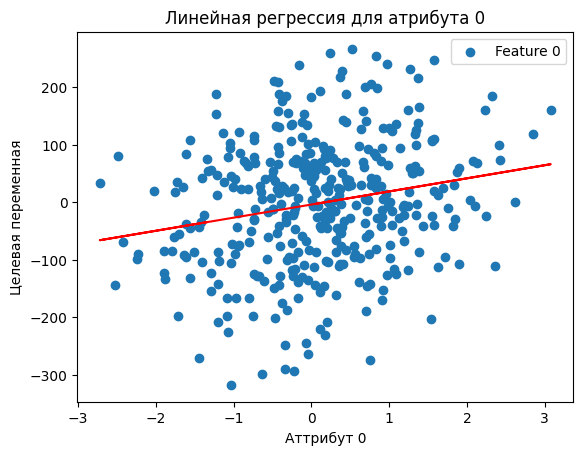

Атрибут 0 Коэффициент: [[22.78111342]]


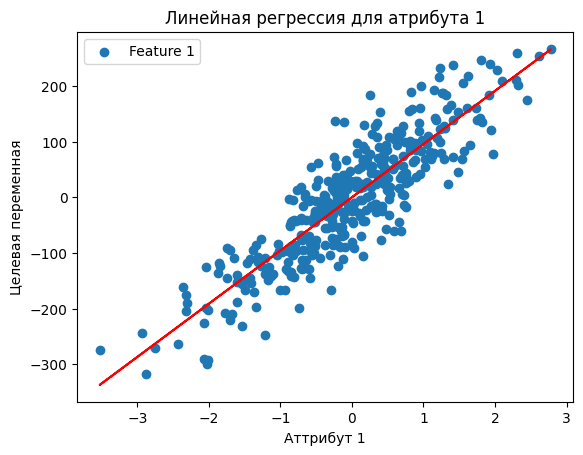

Атрибут 1 Коэффициент: [[95.52010745]]


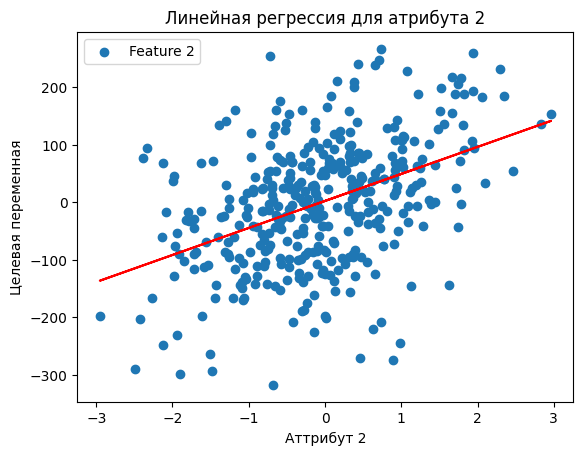

Атрибут 2 Коэффициент: [[46.94897635]]


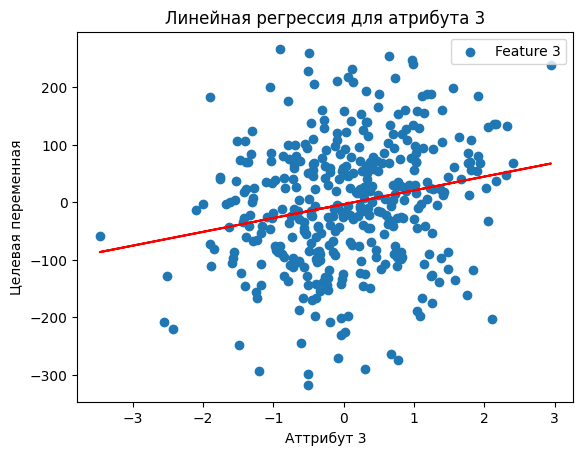

Атрибут 3 Коэффициент: [[23.99882407]]


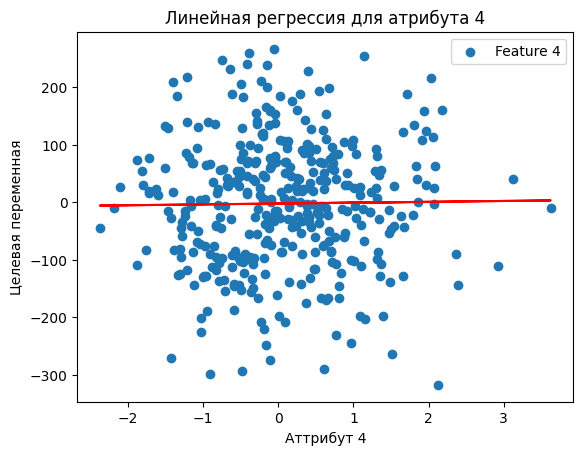

Атрибут 4 Коэффициент: [[1.49082042]]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Загрузка данных
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/0_x.csv", header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/0_y.csv", header=None)

# Построение парных регрессий для каждого атрибута
for i in range(x.shape[1]):
    # Создание и обучение модели
    model = LinearRegression()
    model.fit(x[[i]], y)
    
    # Визуализация данных и регрессии
    plt.scatter(x[i], y, label=f'Feature {i}')
    plt.plot(x[i], model.predict(x[[i]]), c='r')
    
    plt.xlabel(f'Аттрибут {i}')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.title(f'Линейная регрессия для атрибута {i}')
    plt.show()

    # Вывод коэффициента регрессии
    print(f'Атрибут {i} Коэффициент:', model.coef_)


3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

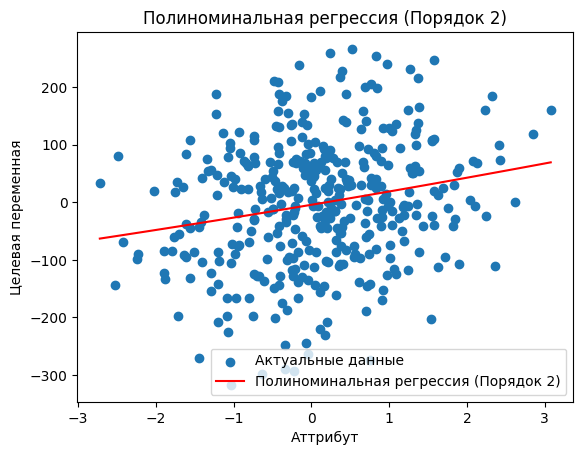

R^2 Оценка (Порядок 2): 0.04367170367915485


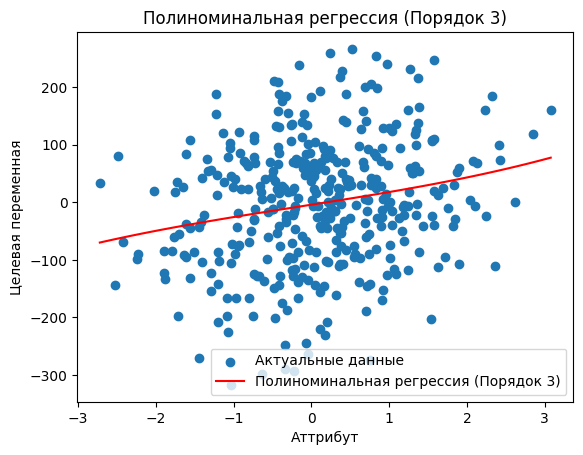

R^2 Оценка (Порядок 3): 0.04376506816920167


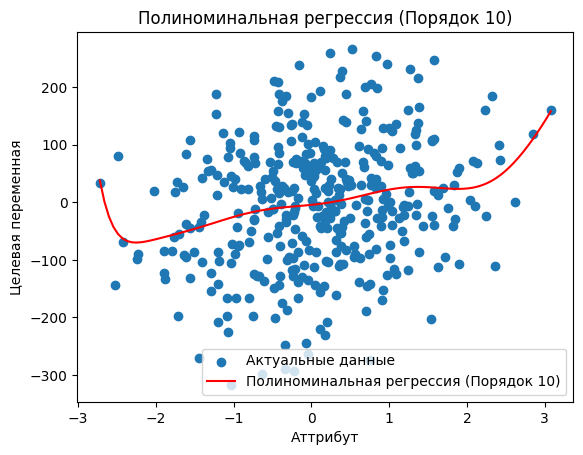

R^2 Оценка (Порядок 10): 0.05035596325168745


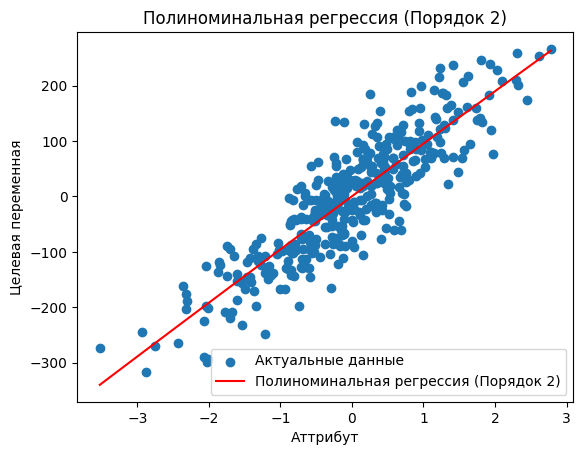

R^2 Оценка (Порядок 2): 0.7699942588883133


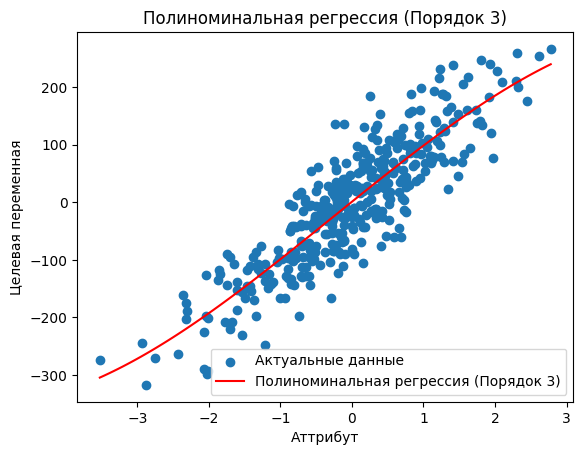

R^2 Оценка (Порядок 3): 0.7711184109235


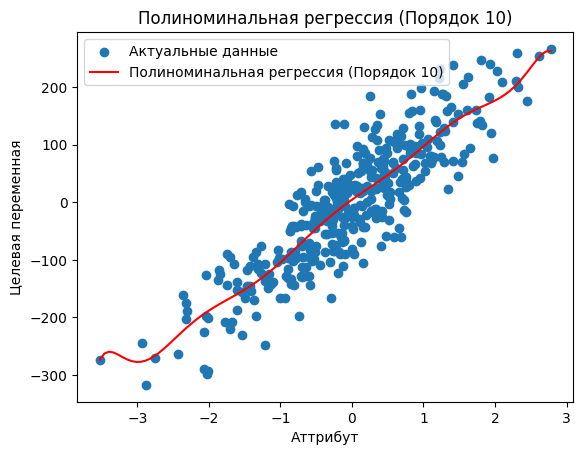

R^2 Оценка (Порядок 10): 0.7726769307411923


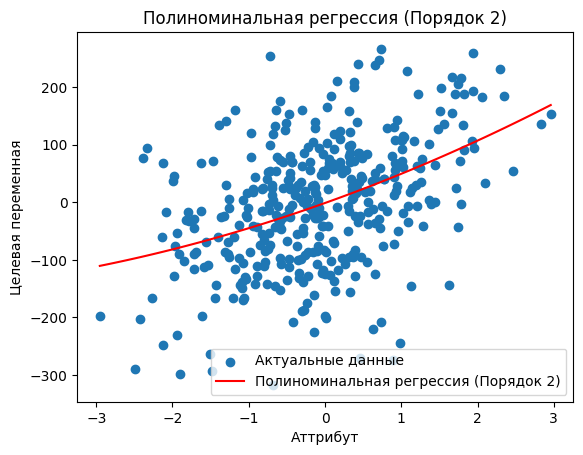

R^2 Оценка (Порядок 2): 0.19000787278473807


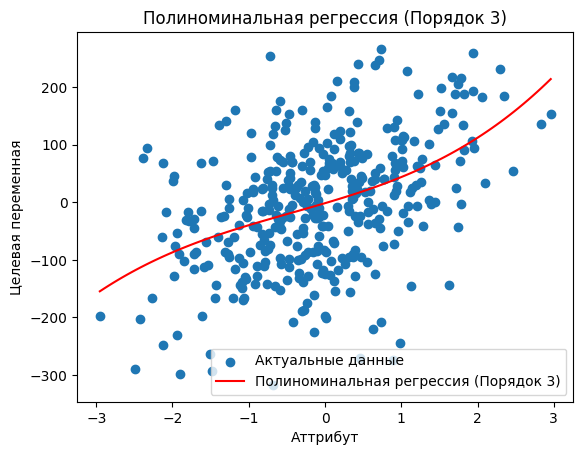

R^2 Оценка (Порядок 3): 0.19280163734543854


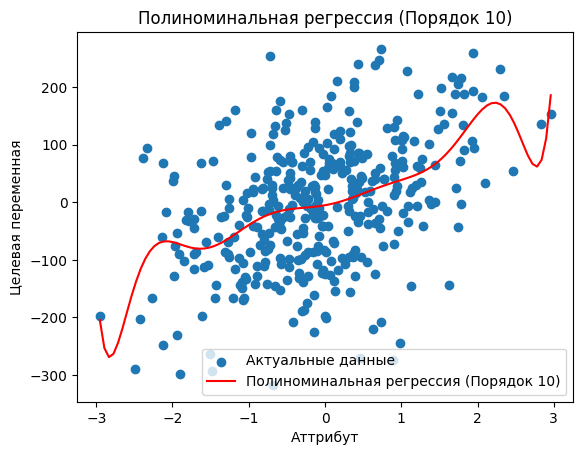

R^2 Оценка (Порядок 10): 0.20440944561264418


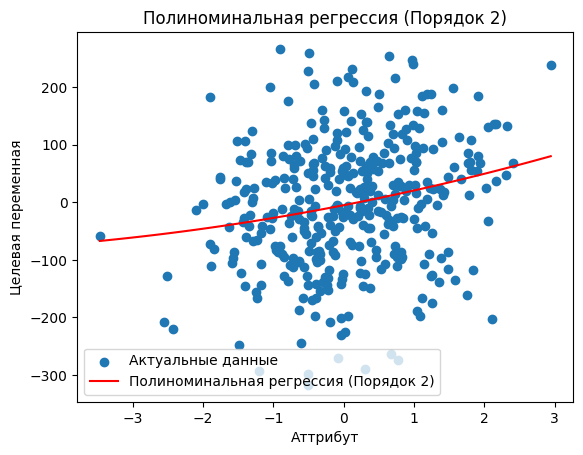

R^2 Оценка (Порядок 2): 0.04794250960519941


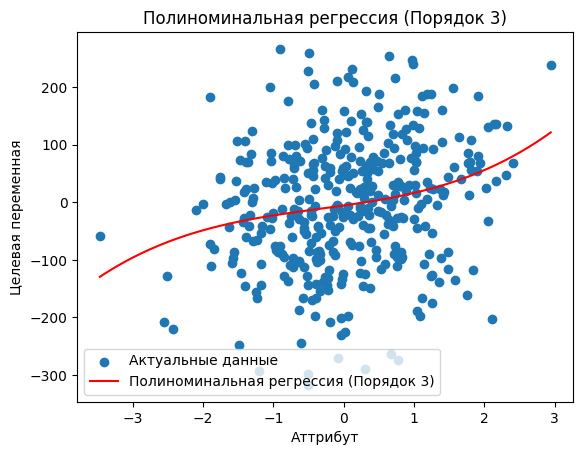

R^2 Оценка (Порядок 3): 0.05031163217811918


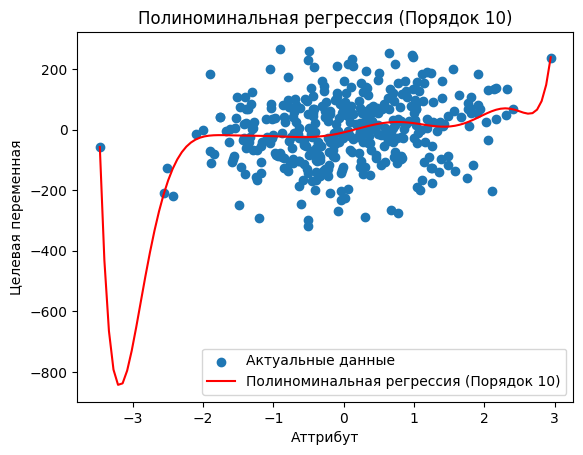

R^2 Оценка (Порядок 10): 0.07266746559268988


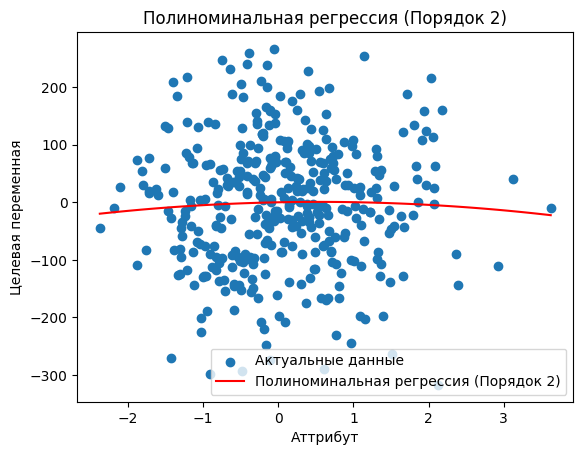

R^2 Оценка (Порядок 2): 0.0010490365524417067


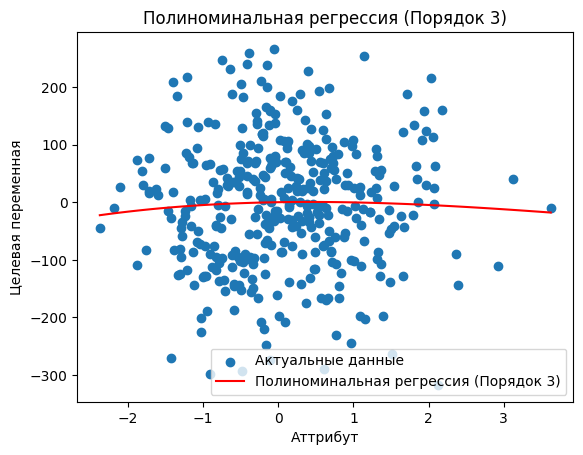

R^2 Оценка (Порядок 3): 0.0010646025332345932


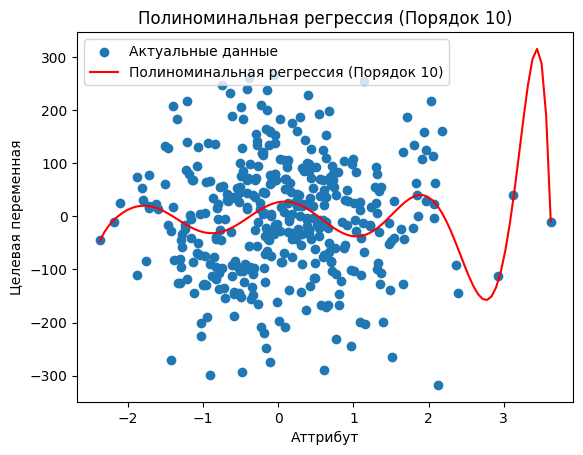

R^2 Оценка (Порядок 10): 0.0450526417134679


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/0_x.csv", header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/0_y.csv", header=None)


# Функция для построения полиномиальной регрессии и визуализации результатов
def polynomial_regression(x, y, degree):
    # Преобразование признаков в полиномиальные
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    # Обучение модели
    model = LinearRegression()
    model.fit(x_poly, y)

    # Предсказание значений
    x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)  # Создаем равномерное распределение точек для построения графика
    x_range_poly = poly.transform(x_range)
    y_pred = model.predict(x_range_poly)

    # Визуализация данных и регрессии
    plt.scatter(x, y, label='Актуальные данные')
    plt.plot(x_range, y_pred, c='r', label=f'Полиноминальная регрессия (Порядок {degree})')
    
    plt.xlabel('Аттрибут')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.title(f'Полиноминальная регрессия (Порядок {degree})')
    plt.show()

    # Вывод коэффициента детерминации (R^2 Score)
    y_pred_all = model.predict(x_poly)
    r2 = r2_score(y, y_pred_all)
    print(f'R^2 Оценка (Порядок {degree}):', r2)

# Построение полиномиальных регрессий для целевой переменной и каждого из признаков
for i in range(x.shape[1]):
    for degree in [2, 3, 10]:
        polynomial_regression(x[[i]], y, degree)
        
'''
Чем ближе R² к 1, тем лучше модель. Однако увеличение порядка полинома может привести к переобучению модели.
'''

4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Загрузка данных
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/0_x.csv", header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/0_y.csv", header=None)

# Функция для построения моделей и оценки точности
def evaluate_model(x, y, model, degree):
    # Преобразование признаков в полиномиальные
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    # Разделение данных на обучающий и тестовый наборы
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

    # Обучение модели
    model.fit(x_train, y_train)

    # Предсказание значений на тестовом наборе
    y_pred = model.predict(x_test)

    # Оценка точности (R^2 Score)
    r2 = r2_score(y_test, y_pred)

    return r2

# Сводная таблица
results = pd.DataFrame(columns=['Аттрибут', 'Порядок', 'R^2 Оценка'])

# Построение и оценка моделей для целевой переменной и каждого из признаков
for i in range(x.shape[1]):
    for degree in [2, 3, 10]:
        model = LinearRegression()
        r2 = evaluate_model(x[[i]], y, model, degree)
        results = pd.concat([results, pd.DataFrame({'Аттрибут': [f'Аттрибут {i}'], 'Порядок': [degree], 'R^2 Оценка': [r2]})], ignore_index=True)

# Вывод сводной таблицы
print(results)


'''
Аттрибут 0 (Порядок 2, R² = 0.051623): Низкое значение R² говорит о том, что модель с порядком 2 недостаточно хорошо соответствует данным. Это может быть признаком недообучения.

Аттрибут 0 (Порядок 3, R² = 0.051229): Также низкое значение R², что подтверждает недостаточную пригодность модели для данных.

Аттрибут 0 (Порядок 10, R² = 0.021485): Еще более низкое значение R², что указывает на недообучение. Более высокий порядок полинома может привести к переобучению.

Аттрибут 1 (Порядок 2, R² = 0.847859): Высокое значение R², что говорит о хорошей соответствии модели данным. Вероятно, это подходящий порядок полинома.

Аттрибут 1 (Порядок 3, R² = 0.851289): Еще более высокое значение R², что подтверждает хорошую пригодность модели.

Аттрибут 1 (Порядок 10, R² = -19.946667): Очень низкое и даже отрицательное значение R² указывает на переобучение модели. Это может быть результатом слишком высокого порядка полинома.

Аттрибут 2 (Порядок 2, R² = 0.107122): Низкое значение R², что говорит о недостаточной пригодности модели.

Аттрибут 2 (Порядок 3, R² = 0.103903): Аналогично, низкое значение R² подтверждает недостаточное соответствие модели данным.

Аттрибут 2 (Порядок 10, R² = 0.099079): Значение R² остается низким, что указывает на недостаточную пригодность.

Аттрибут 3 (Порядок 2, R² = 0.039983): Низкое значение R², недостаточная пригодность модели.

Аттрибут 3 (Порядок 3, R² = 0.038443): Аналогично, низкое значение R² подтверждает недостаточное соответствие модели данным.

Аттрибут 3 (Порядок 10, R² = 0.005776): Значение R² остается низким, что указывает на недостаточную пригодность.

Аттрибут 4 (Порядок 2, R² = -0.002723): Отрицательное значение R² говорит о том, что модель практически бесполезна для описания данных.

Аттрибут 4 (Порядок 3, R² = -0.007776): Также отрицательное значение R², что подтверждает бесполезность модели.

Аттрибут 4 (Порядок 10, R² = -0.049160): Очень низкое отрицательное значение R² указывает на переобучение модели.

Итак, на основе этих результатов можно сделать вывод, что некоторые модели переобучены (высокий порядок полинома), а некоторые недообучены (низкий порядок полинома). Подбор оптимального порядка полинома важен для достижения баланса между слишком простой и сложной моделью.
'''

C:\Users\Alexander\AppData\Local\Temp\ipykernel_8464\653010811.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Аттрибут': [f'Аттрибут {i}'], 'Порядок': [degree], 'R^2 Оценка': [r2]})], ignore_index=True)


      Аттрибут Порядок  R^2 Оценка
0   Аттрибут 0       2    0.051623
1   Аттрибут 0       3    0.051229
2   Аттрибут 0      10    0.021485
3   Аттрибут 1       2    0.847859
4   Аттрибут 1       3    0.851289
5   Аттрибут 1      10  -19.946667
6   Аттрибут 2       2    0.107122
7   Аттрибут 2       3    0.103903
8   Аттрибут 2      10    0.099079
9   Аттрибут 3       2    0.039983
10  Аттрибут 3       3    0.038443
11  Аттрибут 3      10    0.005776
12  Аттрибут 4       2   -0.002723
13  Аттрибут 4       3   -0.007776
14  Аттрибут 4      10   -0.049160


5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Загрузка данных
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/0_x.csv", header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/0_y.csv", header=None)

# Функция для построения моделей и оценки точности
def evaluate_model(x, y, model, degree):
    # Преобразование признаков в полиномиальные
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)

    # Разделение данных на обучающий и тестовый наборы
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

    # Обучение модели
    model.fit(x_train, y_train)

    # Предсказание значений на тестовом наборе
    y_pred = model.predict(x_test)

    # Оценка точности
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return r2, mae, mse, rmse

# Сводная таблица
results = pd.DataFrame(columns=['Аттрибут', 'Порядок', 'R^2 Оценка', 'MAE', 'MSE', 'RMSE'])

# Построение и оценка моделей для целевой переменной и каждого из признаков
for i in range(x.shape[1]):
    for degree in [2, 3, 10]:
        model = LinearRegression()
        r2, mae, mse, rmse = evaluate_model(x[[i]], y, model, degree)
        results = pd.concat([results, pd.DataFrame({'Аттрибут': [f'Аттрибут {i}'], 'Порядок': [degree],
                                                     'R^2 Оценка': [r2], 'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse]})],
                            ignore_index=True)

# Вывод сводной таблицы
print(results)


C:\Users\Alexander\AppData\Local\Temp\ipykernel_8464\1304316904.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Аттрибут': [f'Аттрибут {i}'], 'Порядок': [degree],


      Аттрибут Порядок  R^2 Оценка         MAE            MSE        RMSE
0   Аттрибут 0       2    0.051623   97.073309   14576.461075  120.733016
1   Аттрибут 0       3    0.051229   97.125829   14582.522695  120.758116
2   Аттрибут 0      10    0.021485   98.844293   15039.678972  122.636369
3   Аттрибут 1       2    0.847859   38.347472    2338.399392   48.356999
4   Аттрибут 1       3    0.851289   38.098665    2285.671942   47.808702
5   Аттрибут 1      10  -19.946667  104.734122  321948.240343  567.404829
6   Аттрибут 2       2    0.107122   95.362506   13723.454544  117.147149
7   Аттрибут 2       3    0.103903   95.578049   13772.923349  117.358099
8   Аттрибут 2      10    0.099079   95.568999   13847.063454  117.673546
9   Аттрибут 3       2    0.039983   96.714833   14755.369948  121.471684
10  Аттрибут 3       3    0.038443   97.003769   14779.038419  121.569069
11  Аттрибут 3      10    0.005776   98.831620   15281.129008  123.616864
12  Аттрибут 4       2   -0.002723   9